# Romania administrative divisions 

Data from http://www.diva-gis.org/datadown (choose `Romania`, then `Administrative Areas`). 

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
INPUT_FOLDER_NAME = "/Users/abuzatu/Work/data/geo_spatial/Romania"
CRS_INIT = {"init": "epsg:4326"} # longitude - latitude coordinate system

# Romania map

In [3]:
gdf_country = gpd.read_file(f"{INPUT_FOLDER_NAME}/4/ROU_adm0.shp")
gdf_country

,ID_0,ISO,NAME_0,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,187,ROU,Romania,191,ROU,Romania,ROMANIA,Romania,Romania,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((29.52347 44.78792, 29.52347 44..."


<AxesSubplot:>

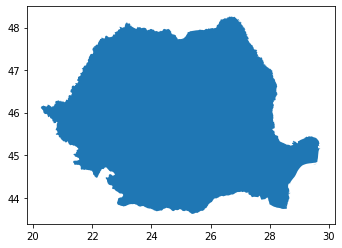

In [4]:
gdf_country.plot()

Text(0.5, 1.0, 'Romania')

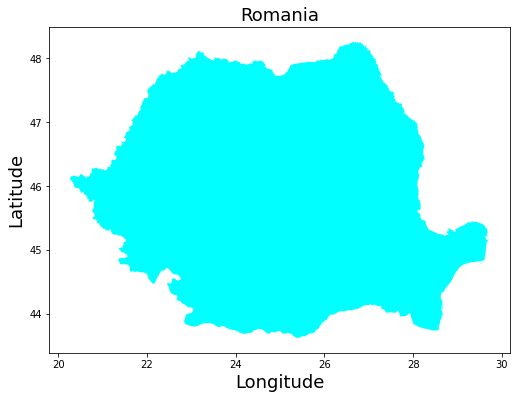

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
gdf_country.plot(ax = ax, color = "cyan")
plt.xlabel("Longitude", fontsize = 18)
plt.ylabel("Latitude", fontsize = 18)
plt.title("Romania", fontsize = 18)

# Romania counties

In [6]:
gdf_counties = gpd.read_file(f"{INPUT_FOLDER_NAME}/4/ROU_adm1.shp")
gdf_counties.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,187,ROU,Romania,1,Alba,Judet,County,None,None,"POLYGON ((22.81332 46.56851, 22.81302 46.56622..."
1,187,ROU,Romania,2,Arad,Judet,County,None,None,"POLYGON ((21.90678 46.66893, 21.90734 46.66837..."
2,187,ROU,Romania,3,Argeș,Judet,County,None,Arges,"POLYGON ((24.77382 45.61148, 24.77572 45.61049..."
3,187,ROU,Romania,4,Bacău,Judet,County,None,Bacau,"POLYGON ((26.90936 46.82119, 26.91127 46.82098..."
4,187,ROU,Romania,5,Bihor,Judet,County,None,None,"POLYGON ((22.18750 47.59959, 22.19328 47.59918..."


In [7]:
gdf_counties.shape

(42, 10)

In [8]:
# 41 counties + the capital Bucharest
gdf_counties.ENGTYPE_1.value_counts()

County          41
Municipality     1
Name: ENGTYPE_1, dtype: int64

In [9]:
gdf_capital = gdf_counties[gdf_counties.ENGTYPE_1 == "Municipality"]
gdf_capital

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
9,187,ROU,Romania,10,Bucharest,Municipiu,Municipality,None,Bucuresti,"POLYGON ((26.03870 44.38544, 26.03649 44.38741..."


Text(0.5, 1.0, 'Romania: 41 counties + the capital city ')

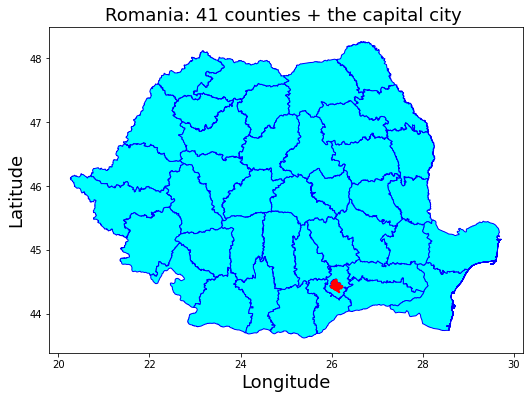

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
# plot counties
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("blue", alpha=1.0)
gdf_counties.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  linewidth = 1,
                 )
# add capital in other color
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
gdf_capital.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                 )
#
plt.xlabel("Longitude", fontsize = 18)
plt.ylabel("Latitude", fontsize = 18)
plt.title("Romania: 41 counties + the capital city ", fontsize = 18)

# Romania commune (towns and rural areas)

In [11]:
gdf_commune = gpd.read_file(f"{INPUT_FOLDER_NAME}/4/ROU_adm2.shp")
gdf_commune.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,187,ROU,Romania,1,Alba,1,Abrud,Comune,Commune,None,Oras Abrud,"POLYGON ((23.11756 46.26924, 23.10890 46.26537..."
1,187,ROU,Romania,1,Alba,2,Aiud,Comune,Commune,None,Municipiul Aiud,"POLYGON ((23.68714 46.24480, 23.68568 46.24457..."
2,187,ROU,Romania,1,Alba,3,Alba Iulia,Comune,Commune,None,Municipiul Alba Iulia,"POLYGON ((23.62130 46.11345, 23.61981 46.11189..."
3,187,ROU,Romania,1,Alba,4,Albac,Comune,Commune,None,None,"POLYGON ((23.02857 46.50118, 23.02879 46.49437..."
4,187,ROU,Romania,1,Alba,5,Almasu Mare,Comune,Commune,None,None,"POLYGON ((23.16239 46.03325, 23.16147 46.03367..."


In [12]:
gdf_commune.shape

(2939, 12)

In [13]:
# how many communes for each county (NAME_1)
gdf_commune.NAME_1.value_counts()

Olt                101
Prahova            100
Argeș               99
Dolj                99
Suceava             98
Mureș               97
Bihor               94
Teleorman           88
Iași                88
Bacău               87
Buzău               85
Vâlcea              85
Dâmbovița           82
Timiș               82
Cluj                80
Caraș-Severin       77
Alba                76
Arad                75
Vaslui              75
Neamț               74
Botoșani            72
Gorj                70
Hunedoara           69
Maramureș           69
Mehedinți           64
Vrancea             64
Sibiu               62
Satu Mare           60
Galați              59
Constanța           59
Sălaj               58
Harghita            58
Bistrița-Năsăud     57
Ialomița            53
Călărași            53
Brașov              52
Giurgiu             49
Tulcea              48
Brăila              43
Ilfov               39
Covasna             38
Bucharest            1
Name: NAME_1, dtype: int64

In [14]:
gdf_commune.ENGTYPE_2.value_counts()

Commune         2938
Municipality       1
Name: ENGTYPE_2, dtype: int64

<AxesSubplot:>

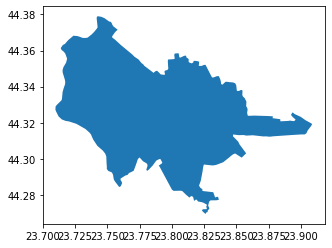

In [15]:
# find and plot only a particular town
gdf_commune[gdf_commune.NAME_2 == "Craiova"].plot()

The communes are of three types: cities (large urban), towns (small urban) and rural communes, as described in [Wikipedia](https://en.wikipedia.org/wiki/Municipiu). We can recognise which are which as in the field `VARNAME_2` they have a prefix `Municipiul` for cities, `Oras` for towns and nothing for rural communes. 

Let's add a new column with this distinction.

In [16]:
def get_type(x):
    if x == None:
        result = "rural"
    elif x.startswith("Municipiul"):
        result = "city"
    elif x.startswith("Oras"):
        result = "town"
    else:
        result = "rural"
    return result

In [17]:
gdf_commune["TYPE"] = gdf_commune.VARNAME_2.map(lambda x: get_type(x))
gdf_commune.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,TYPE
0,187,ROU,Romania,1,Alba,1,Abrud,Comune,Commune,None,Oras Abrud,"POLYGON ((23.11756 46.26924, 23.10890 46.26537...",town
1,187,ROU,Romania,1,Alba,2,Aiud,Comune,Commune,None,Municipiul Aiud,"POLYGON ((23.68714 46.24480, 23.68568 46.24457...",city
2,187,ROU,Romania,1,Alba,3,Alba Iulia,Comune,Commune,None,Municipiul Alba Iulia,"POLYGON ((23.62130 46.11345, 23.61981 46.11189...",city
3,187,ROU,Romania,1,Alba,4,Albac,Comune,Commune,None,None,"POLYGON ((23.02857 46.50118, 23.02879 46.49437...",rural
4,187,ROU,Romania,1,Alba,5,Almasu Mare,Comune,Commune,None,None,"POLYGON ((23.16239 46.03325, 23.16147 46.03367...",rural


In [18]:
gdf_commune.TYPE.value_counts()

rural    2624
town      213
city      102
Name: TYPE, dtype: int64

In [19]:
# just as Wikipedia says, there are 103, these 102 plus the capital
len(list(gdf_commune[gdf_commune["TYPE"] == "city"].VARNAME_2.values))

102

In [20]:
gdf_capital = gdf_commune[gdf_commune.ENGTYPE_2 == "Municipality"]
gdf_capital

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,TYPE
655,187,ROU,Romania,10,Bucharest,656,Municipiul Bucuresti,Comune,Municipality,None,None,"POLYGON ((26.03870 44.38544, 26.03649 44.38741...",rural


In [21]:
gdf_commune.NAME_2.str.startswith("Municipiul").value_counts()

False    2938
True        1
Name: NAME_2, dtype: int64

In [22]:
# note the capital appears rural, as it had no extra name
# with Municipiu in front, as its own name contained the Municipiu in front
# and it is the only town that does that
# so let's set it by hand to a city
# now there are correctly 103 cities
gdf_commune.loc[gdf_commune.NAME_2.str.startswith("Municipiul"), ['TYPE']] = "city"
gdf_commune.TYPE.value_counts()

rural    2623
town      213
city      103
Name: TYPE, dtype: int64

In [23]:
gdf_cities = gdf_commune[gdf_commune.TYPE == "city"]
gdf_cities.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,TYPE
1,187,ROU,Romania,1,Alba,2,Aiud,Comune,Commune,None,Municipiul Aiud,"POLYGON ((23.68714 46.24480, 23.68568 46.24457...",city
2,187,ROU,Romania,1,Alba,3,Alba Iulia,Comune,Commune,None,Municipiul Alba Iulia,"POLYGON ((23.62130 46.11345, 23.61981 46.11189...",city
10,187,ROU,Romania,1,Alba,11,Blaj,Comune,Commune,None,Municipiul Blaj,"POLYGON ((24.01261 46.09863, 24.01015 46.09917...",city
62,187,ROU,Romania,1,Alba,63,Sebes,Comune,Commune,None,Municipiul Sebes,"POLYGON ((23.51497 45.97035, 23.51644 45.97191...",city
78,187,ROU,Romania,2,Arad,79,Arad,Comune,Commune,None,Municipiul Arad,"POLYGON ((21.36723 46.14605, 21.36772 46.14562...",city


In [24]:
gdf_towns = gdf_commune[gdf_commune.TYPE == "town"]
gdf_towns.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,TYPE
0,187,ROU,Romania,1,Alba,1,Abrud,Comune,Commune,None,Oras Abrud,"POLYGON ((23.11756 46.26924, 23.10890 46.26537...",town
7,187,ROU,Romania,1,Alba,8,Baia De Aries,Comune,Commune,None,Oras Baia De Aries,"POLYGON ((23.34622 46.36742, 23.34955 46.36284...",town
14,187,ROU,Romania,1,Alba,15,Campeni,Comune,Commune,None,Oras Campeni,"POLYGON ((23.03795 46.33308, 23.03854 46.34007...",town
23,187,ROU,Romania,1,Alba,24,Cugir,Comune,Commune,None,Oras Cugir,"POLYGON ((23.43559 45.58604, 23.43183 45.58751...",town
44,187,ROU,Romania,1,Alba,45,Ocna Mures,Comune,Commune,None,Oras Ocna Mures,"POLYGON ((23.75821 46.36470, 23.75893 46.36478...",town


In [25]:
gdf_rurals = gdf_commune[gdf_commune.TYPE == "rural"]
gdf_rurals.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,TYPE
3,187,ROU,Romania,1,Alba,4,Albac,Comune,Commune,None,None,"POLYGON ((23.02857 46.50118, 23.02879 46.49437...",rural
4,187,ROU,Romania,1,Alba,5,Almasu Mare,Comune,Commune,None,None,"POLYGON ((23.16239 46.03325, 23.16147 46.03367...",rural
5,187,ROU,Romania,1,Alba,6,Arieseni,Comune,Commune,None,None,"POLYGON ((22.81477 46.55630, 22.81535 46.55484...",rural
6,187,ROU,Romania,1,Alba,7,Avram Iancu,Comune,Commune,None,None,"POLYGON ((22.83677 46.38395, 22.84167 46.38097...",rural
8,187,ROU,Romania,1,Alba,9,Berghin,Comune,Commune,None,None,"POLYGON ((23.65391 46.03404, 23.65875 46.03849...",rural


Text(0.5, 1.0, 'Romania: the 103 cities ')

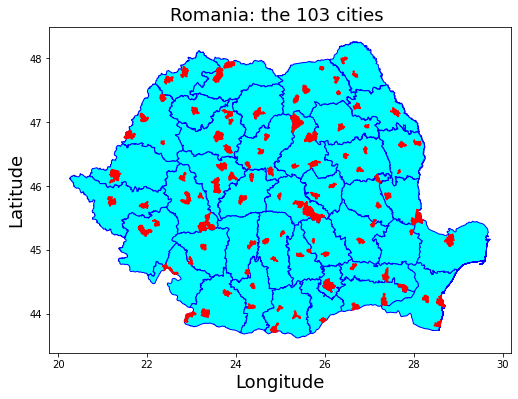

In [26]:
# let's plot on the map all the cities
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
# plot counties
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("blue", alpha=1.0)
gdf_counties.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  linewidth = 1,
                 )
# add cities in other color
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
gdf_cities.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                 )
#
plt.xlabel("Longitude", fontsize = 18)
plt.ylabel("Latitude", fontsize = 18)
plt.title(f"Romania: the {len(gdf_cities)} cities ", fontsize = 18)

Text(0.5, 1.0, 'Romania: the 103 cities and 213 towns')

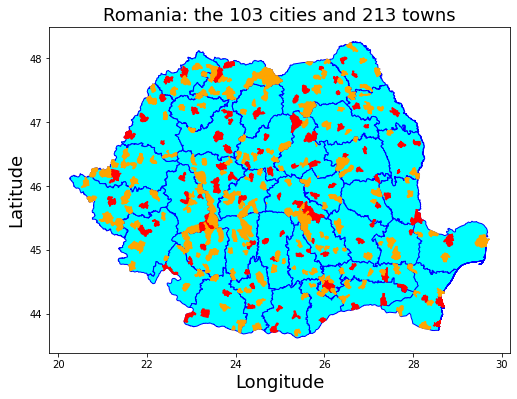

In [27]:
# let's plot on the map all the cities and towns
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
# plot counties
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("blue", alpha=1.0)
gdf_counties.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  linewidth = 1,
                 )
# add cities in other color
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
gdf_cities.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                 )

# add towns in other color
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("orange", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("orange", alpha=1.0)
gdf_towns.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                 )
#
plt.xlabel("Longitude", fontsize = 18)
plt.ylabel("Latitude", fontsize = 18)
plt.title(f"Romania: the {len(gdf_cities)} cities and {len(gdf_towns)} towns", fontsize = 18)

Text(0.5, 1.0, 'Romania: the 103 cities, 213 towns, 2623 rural communes')

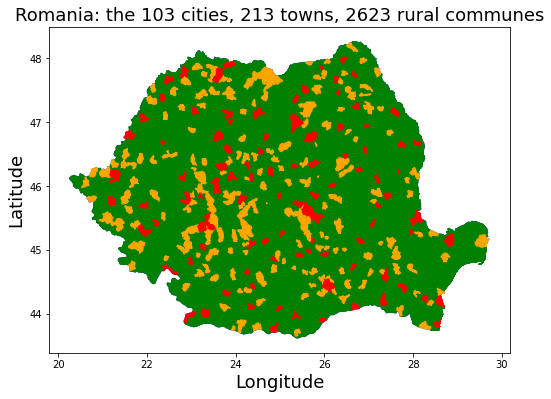

In [28]:
# let's plot on the map all the cities and towns and rural communes
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
# plot counties
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("blue", alpha=1.0)
gdf_counties.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  linewidth = 1,
                  zorder = 0,
                 )
# add cities in other color
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
gdf_cities.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  zorder = 3,
                 )

# add towns in other color
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("orange", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("orange", alpha=1.0)
gdf_towns.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  zorder = 2, 
                 )
# add rurals in other color
polygon_color_face = matplotlib.colors.colorConverter.to_rgba("green", alpha=1.0)
polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("green", alpha=1.0)
gdf_rurals.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  zorder = 1,
                 )
#
plt.xlabel("Longitude", fontsize = 18)
plt.ylabel("Latitude", fontsize = 18)
plt.title(f"Romania: the {len(gdf_cities)} cities, {len(gdf_towns)} towns, {len(gdf_rurals)} rural communes", fontsize = 18)

In [29]:
# let's show only a particular county, say Dolj
def plot_county(county):
    gdf_counties_2 = gdf_counties[gdf_counties.NAME_1 == county]
    gdf_cities_2 = gdf_cities[gdf_cities.NAME_1 == county]
    gdf_towns_2 = gdf_towns[gdf_towns.NAME_1 == county]
    gdf_rurals_2 = gdf_rurals[gdf_rurals.NAME_1 == county]

    # let's plot on the map all the cities and towns and rural communes
    fig, ax = plt.subplots(1, 1, figsize = (10, 6))
    # plot counties
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("blue", alpha=1.0)
    gdf_counties_2.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  linewidth = 1,
                  zorder = 0,
                 )
    # add cities in other color
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
    gdf_cities_2.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  zorder = 3,
                 )
    # add towns in other color
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("orange", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("orange", alpha=1.0)
    gdf_towns_2.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  zorder = 2, 
                 )
    # add rurals in other color
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("green", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("green", alpha=1.0)
    gdf_rurals_2.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                zorder = 1,
                 )
    #
    plt.xlabel("Longitude", fontsize = 18)
    plt.ylabel("Latitude", fontsize = 18)
    plt.title(f"Romania, {county} county: the {len(gdf_cities_2)} cities, {len(gdf_towns_2)} towns, {len(gdf_rurals_2)} rural communes", fontsize = 18)

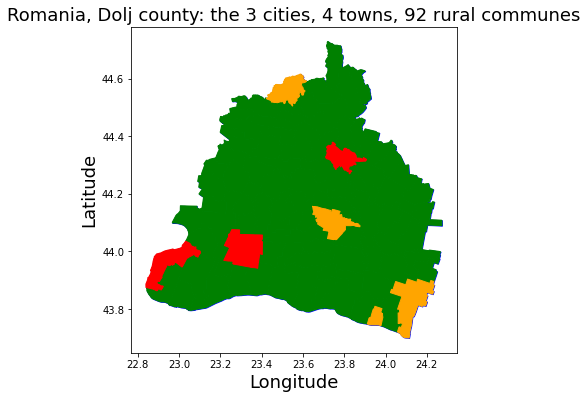

In [30]:
plot_county("Dolj")

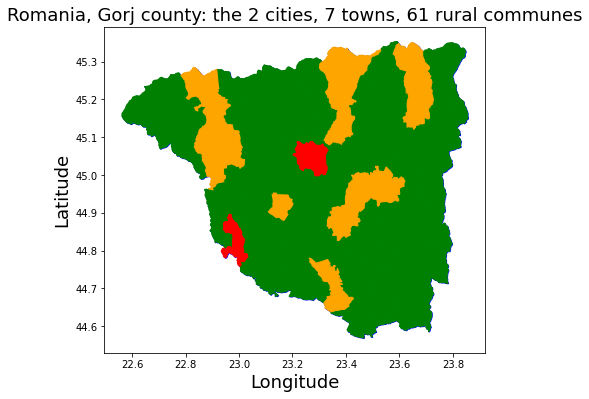

In [31]:
plot_county("Gorj")

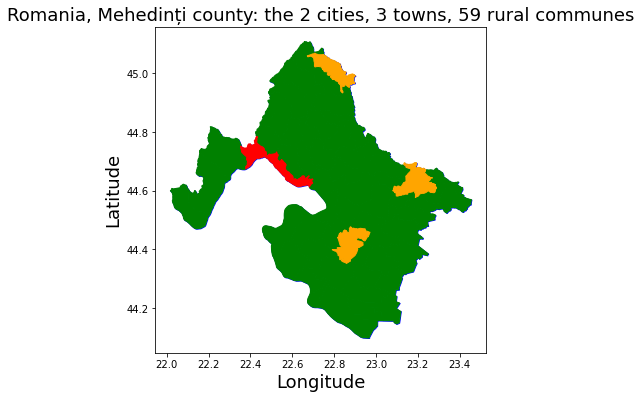

In [32]:
plot_county("Mehedinți")

/Users/abuzatu/Work/ATLAS/Analyses/geo_spatial/env_geo_spatial/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/abuzatu/Work/ATLAS/Analyses/geo_spatial/env_geo_spatial/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/Users/abuzatu/Work/ATLAS/Analyses/geo_spatial/env_geo_spatial/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


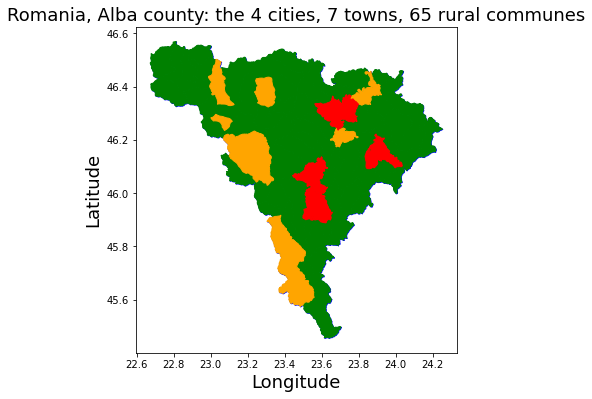

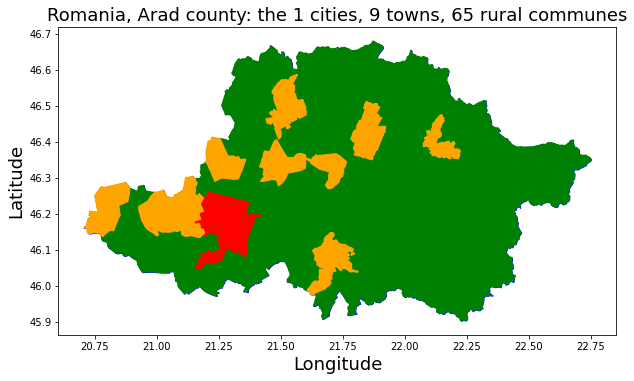

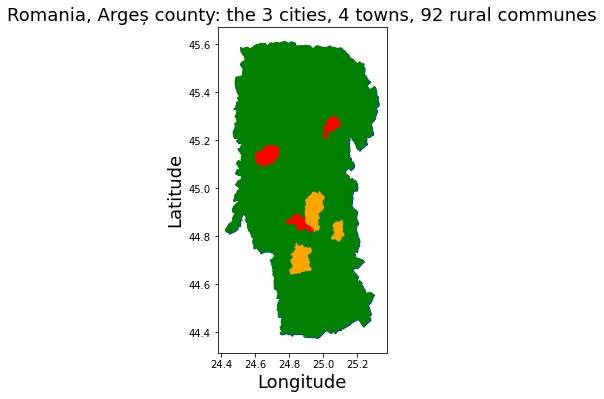

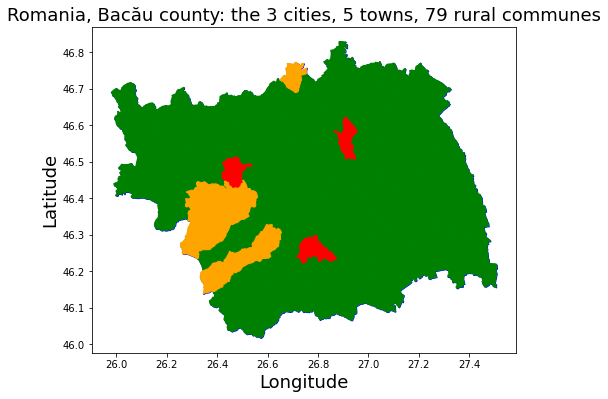

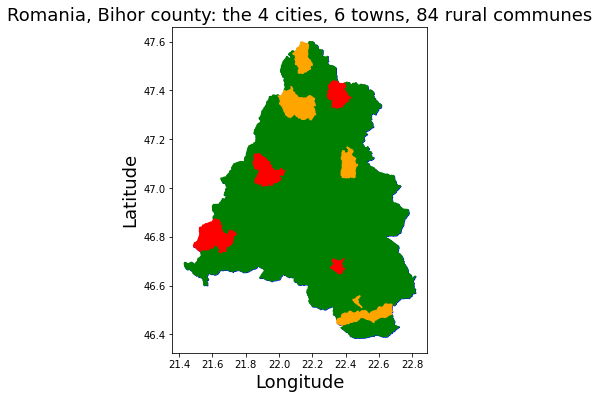

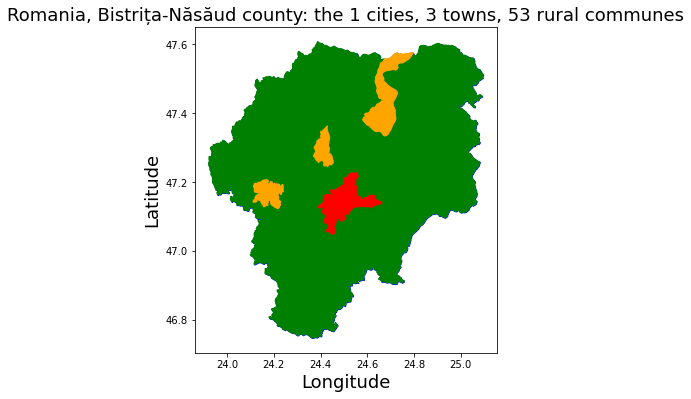

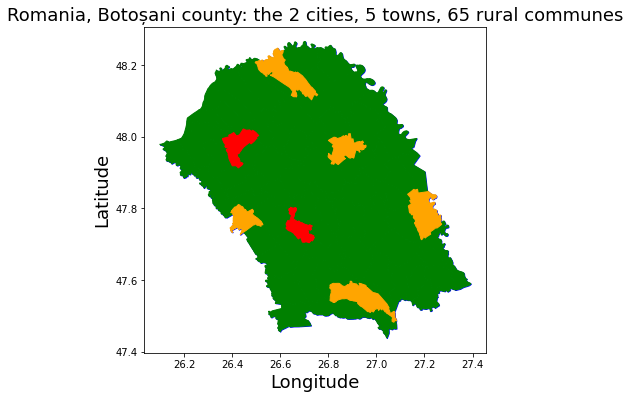

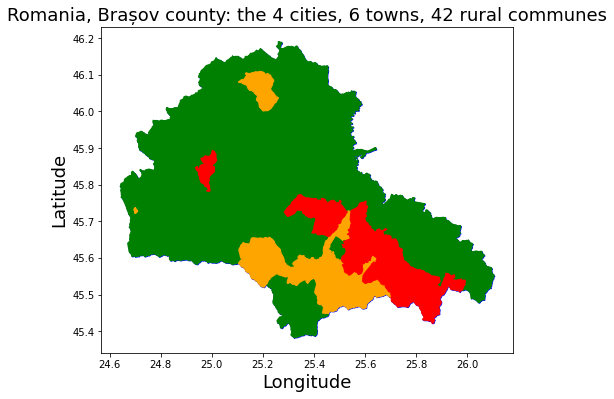

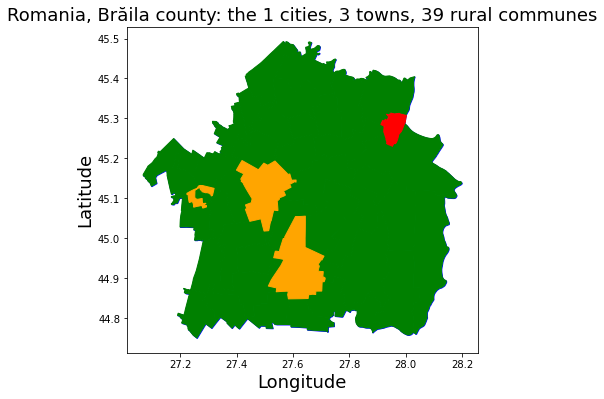

ValueError: cannot convert float NaN to integer

<Figure size 720x432 with 1 Axes>

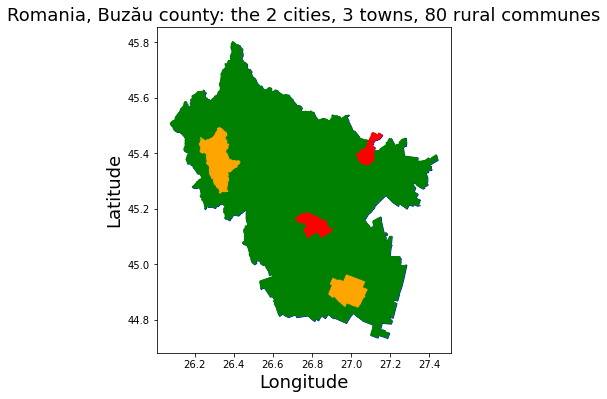

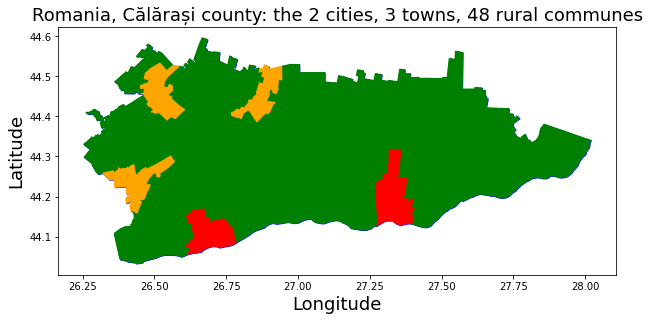

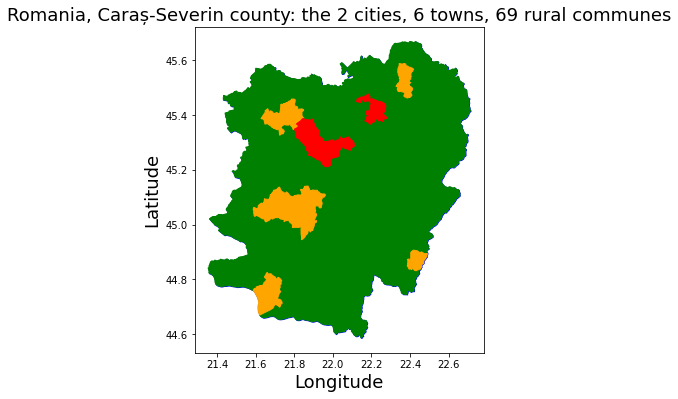

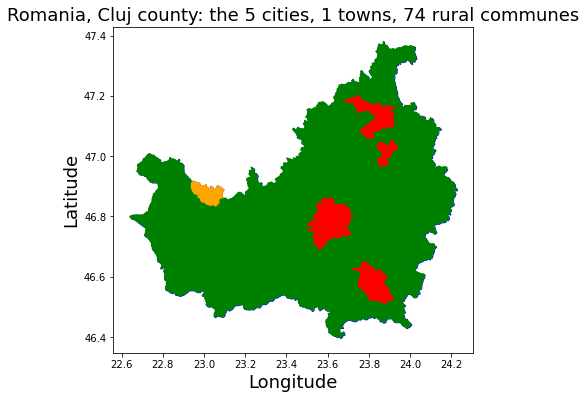

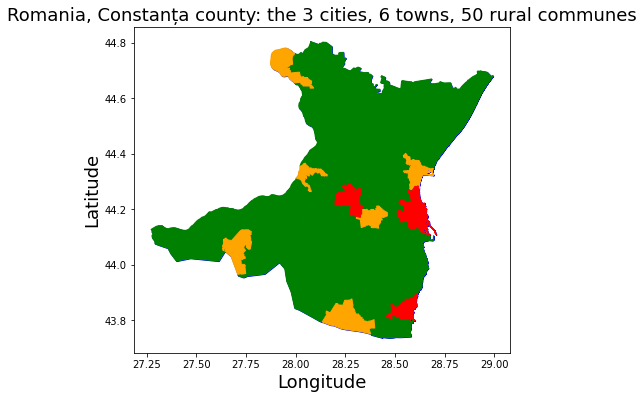

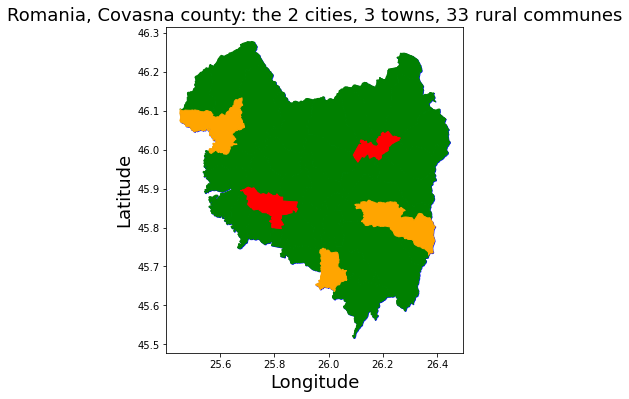

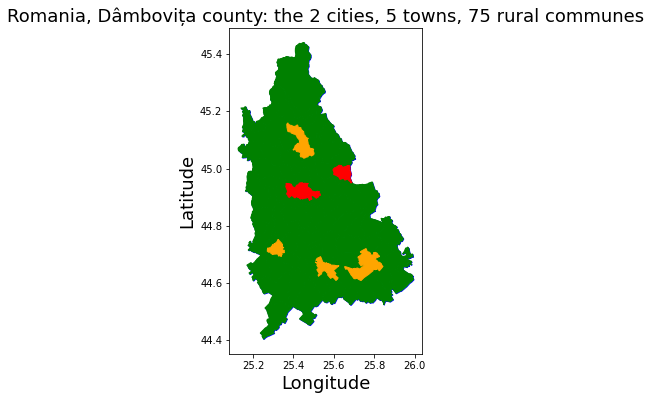

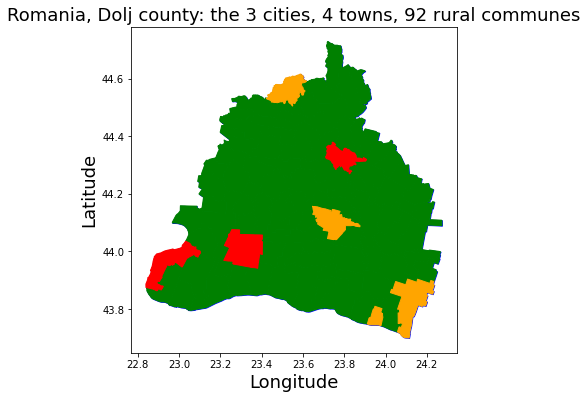

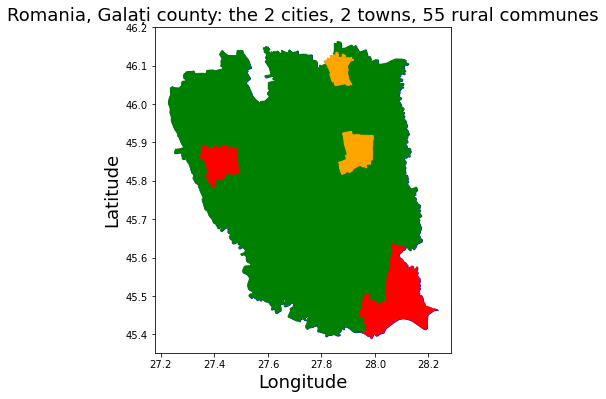

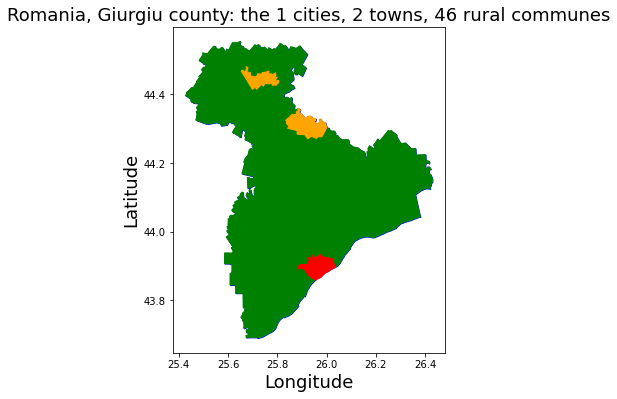

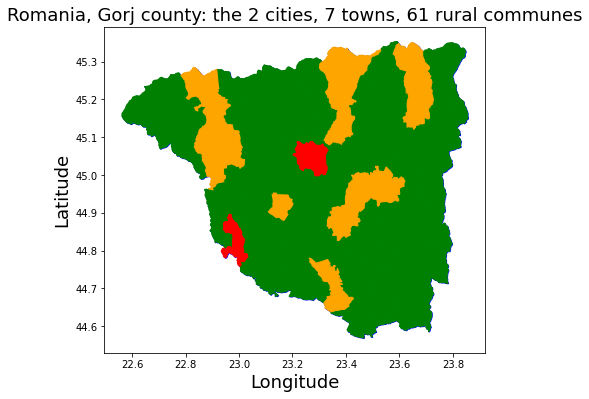

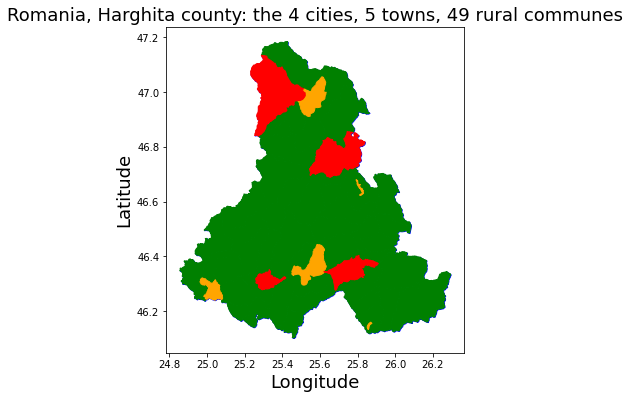

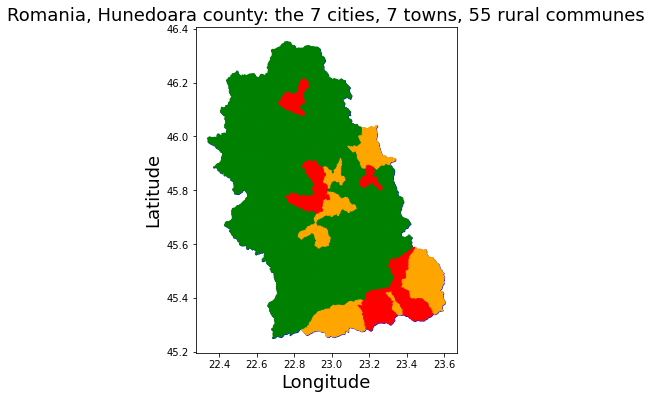

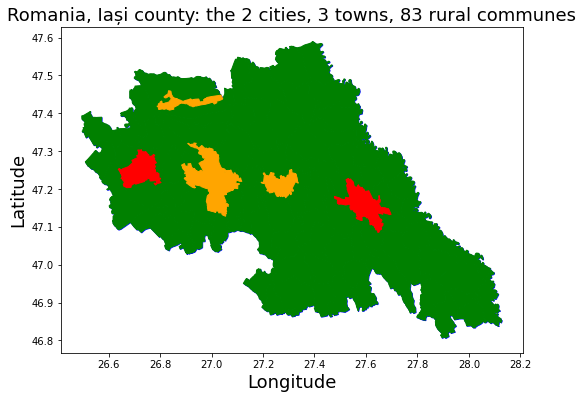

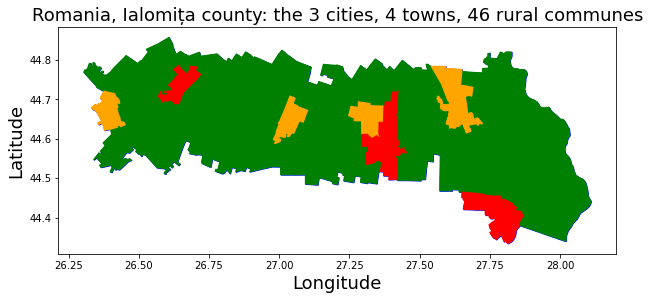

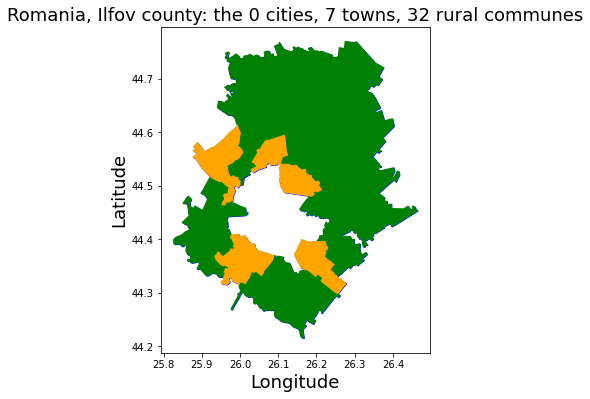

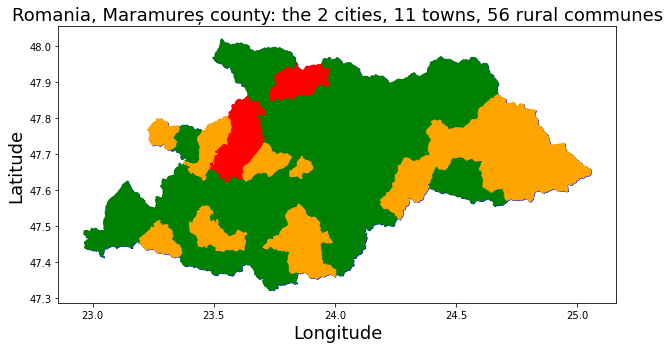

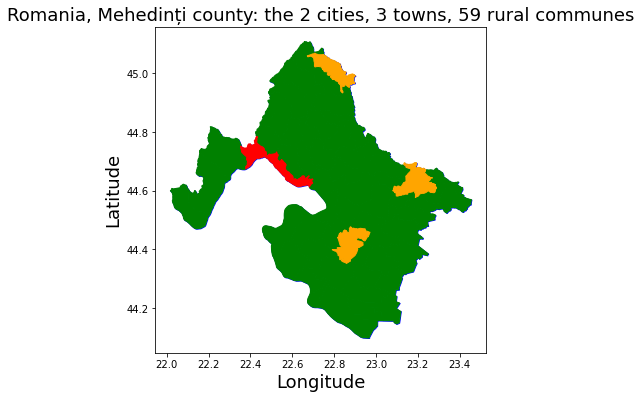

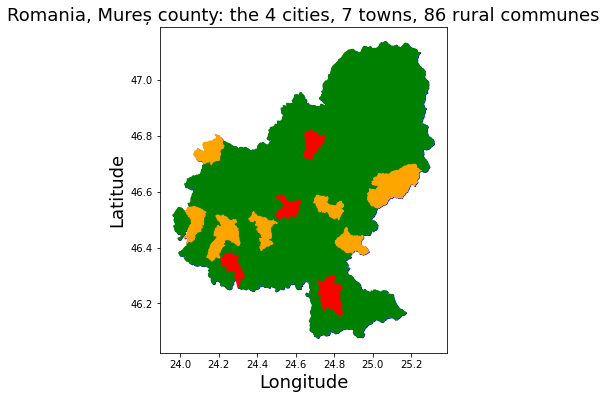

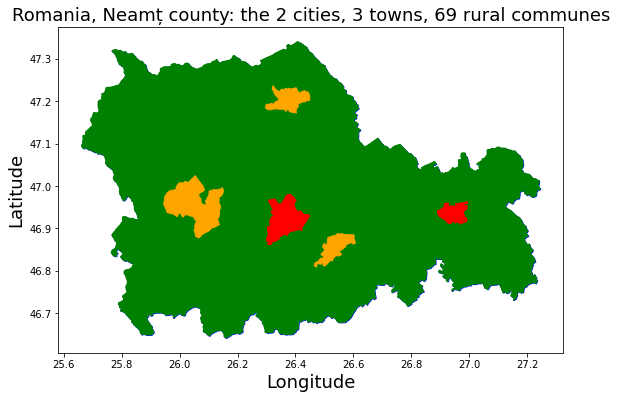

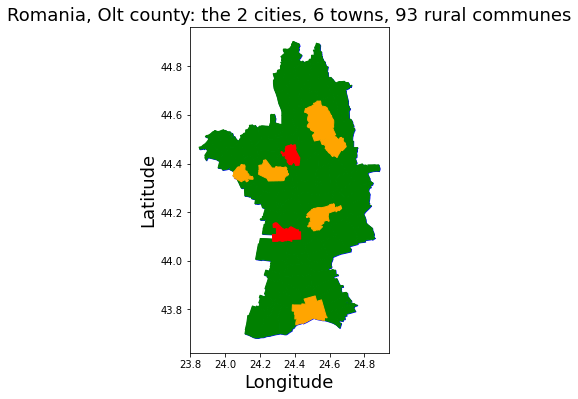

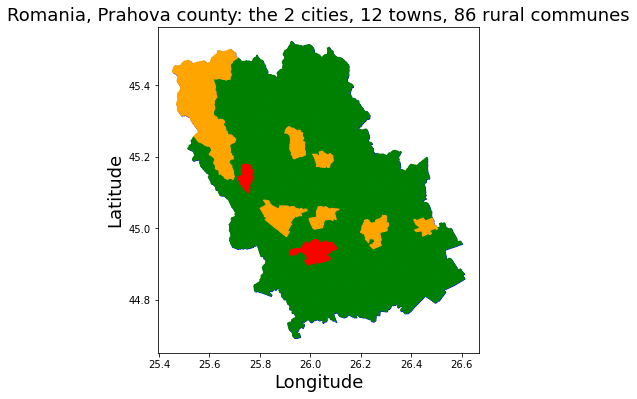

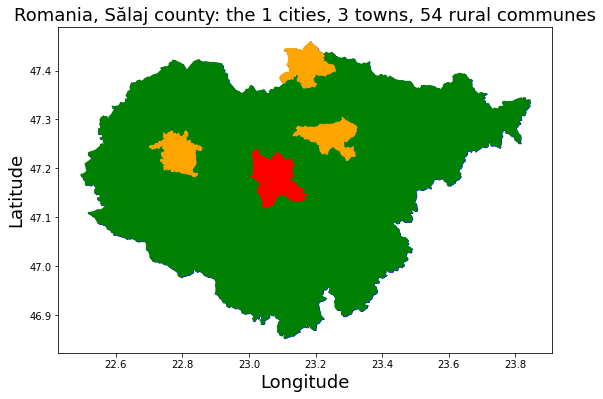

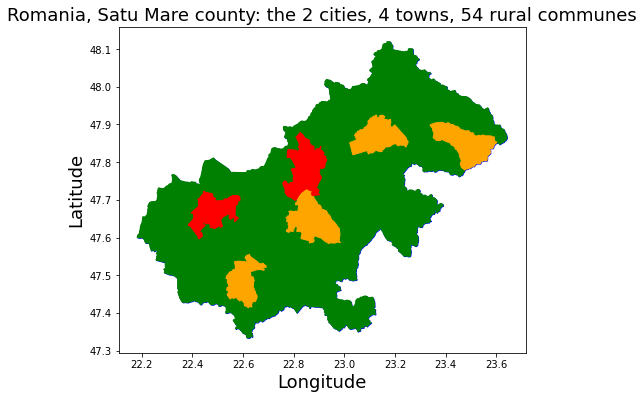

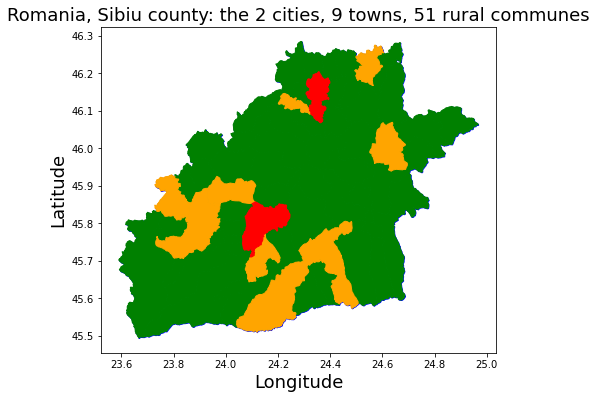

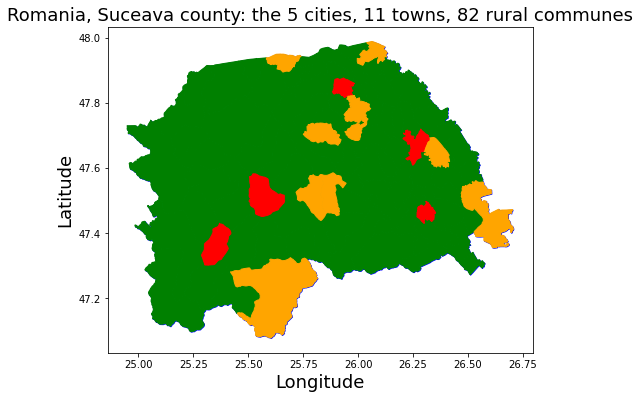

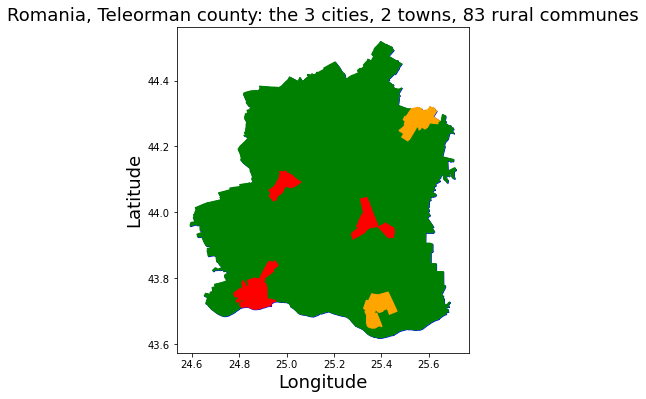

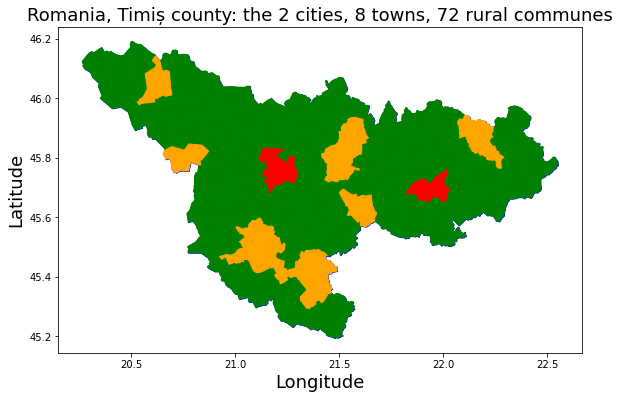

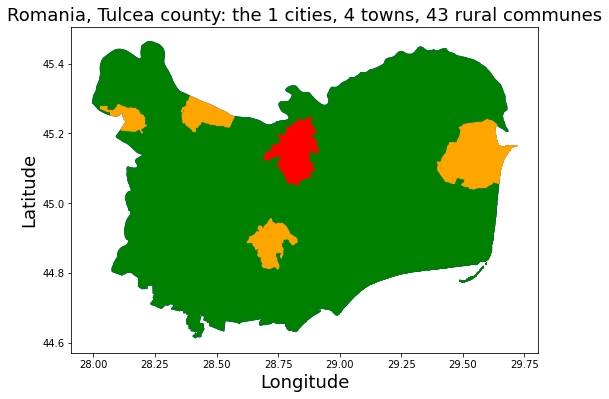

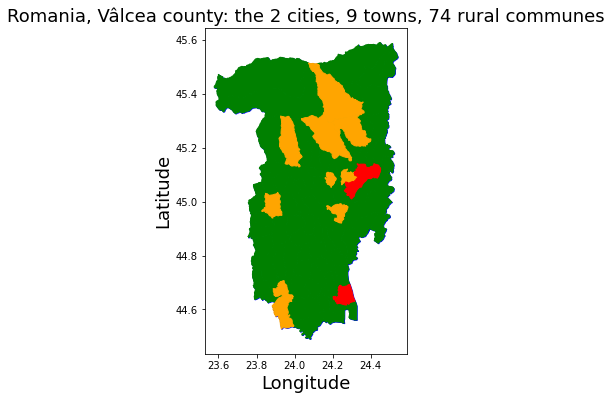

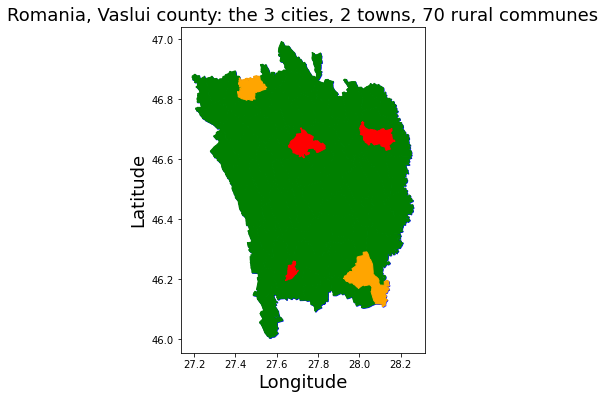

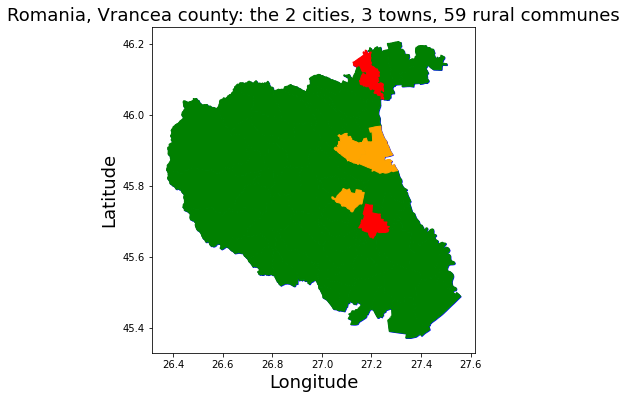

In [33]:
# create this plot for all counties
for county in gdf_commune.NAME_1.unique():
    plot_county(county)